# *Stock Market Clustering*

In this project, we will be extracting live stock market data from Yahoo finance. We will find similarities among various companies using their stock market prices and then cluster them into differeent clusters using **K Means Algorithm**
<br>

This is an **Unsupervised learning problem**, we will use clustering a algorithm.



In [1]:
# !pip install pandas_datareader

In [9]:
# !pip install yfinance

In [3]:
# IMPORTING REQUIRED LIBRRIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data
import pandas_datareader 
%matplotlib inline

In [4]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrpo Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electronics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mistubishi':'8058.T',
    'Sony':'SONY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'
}

In [5]:
# import yfinance as yf
# start_date = '2015-01-01'
# end_date = '2020-12-31'
# ticker = list(companies_dict.values())
# yf.download(ticker, start_date, end_date)

In [28]:
data_source = 'yahoo'
start_date = '2015-04-25' # YY-MM-DD
end_date = '2020-04-25' # YY-MM-DD
sData = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

In [32]:
sData.head()

Attributes  Adj Close                                                \
Symbols          AMZN       AAPL        WBA         NOC          BA   
Date                                                                  
2015-04-24  22.254999  29.433416  68.247200  142.742584  130.596771   
2015-04-27  21.927999  29.968853  68.358322  141.286728  130.068771   
2015-04-28  21.465500  29.496675  68.326576  141.622055  129.813553   
2015-04-29  21.468500  29.062902  67.127991  140.413284  128.616684   
2015-04-30  21.089001  28.274427  65.826233  135.913361  126.143822   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC         IBM        TXN  ...   
Date                                                                 ...   
2015-04-24  158.681305  80.896286  25.707590  115.496712  44.613327  ...   
2015-04-27  157.438614  79.011932  26.044167  116.142952  45.289902  ...   
2015-04-28  157.584808  79.331459  26.460865  118.313019  45.183289  ...   
2015-04-29  155.367477  79.487114  26.356689  118.639572  45.125870  ...   
2015-04-30  151.558243  79.102081  26.084229  116.523918  44.461533  ...   

Attributes      Volume                                                         \
Symbols            JNJ        TM        HMC     8058.T       SONY         XOM   
Date                                                                            
2015-04-24   6566900.0  277500.0   824800.0        NaN  3291100.0   8405700.0   
2015-04-27   9113900.0  273000.0   557200.0  4079100.0  1472600.0  10534600.0   
2015-04-28   7484600.0  421900.0  2455300.0  6382600.0   957100.0   9633800.0   
2015-04-29   8926200.0  282900.0  1481400.0        NaN  1089200.0  12534100.0   
2015-04-30  10170600.0  246800.0   750000.0  7040100.0  1271100.0  13947700.0   

Attributes                                                 
Symbols           CVX        VLO           F          BAC  
Date                                                       
2015-04-24  4995000.0  5277700.0  20293300.0   40766100.0  
2015-04-27  4858700.0  8056400.0  34824900.0   73523400.0  
2015-04-28  5321600.0  7905400.0  56634200.0   58080100.0  
2015-04-29  5665800.0  6002600.0  35126900.0  134499400.0  
2015-04-30  6666800.0  8067500.0  30269300.0   78313900.0  

[5 rows x 156 columns]

In [33]:
# we can also verify from https://finance.yahoo.com/

In [38]:
sData.isna().sum()

Attributes  Symbols
Adj Close   AMZN       42
            AAPL       42
            WBA        42
            NOC        42
            BA         42
                       ..
Volume      XOM        42
            CVX        42
            VLO        42
            F          42
            BAC        42
Length: 156, dtype: int64

In [39]:
sData.dropna(inplace=True)

In [49]:
stock_open = np.array(sData['Open'].T) # stock open is np array of transpose of sData['Open']
stock_close = np.array(sData['Close'].T) # stock close is np array of transpose of sData['Close']

In [50]:
# movements in the difference of opening and closing prices of a particular day
# Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).

movements = stock_close - stock_open
movements

array([[-0.2650013 , -0.46000099, -0.26649857, ..., -0.27549744,
        -0.02649689, -0.33899689],
       [ 0.08499908, -0.97500229, -0.87249947, ...,  0.62250519,
        -0.20999908,  1.44249725],
       [-0.56999969,  0.24000549, -1.06999969, ...,  0.40999985,
         0.36999893,  0.05000305],
       ...,
       [-0.90999985, -1.11999893, -1.14999771, ..., -1.40000153,
         0.04999924, -0.29999924],
       [ 0.07999992,  0.12999916, -0.17000008, ..., -0.0999999 ,
         0.08999968, -0.05999994],
       [-0.06999969,  0.06999969, -0.06999969, ..., -0.36000061,
        -0.08999825,  0.06999969]])

In [54]:
# Sum of the differences of closing and opening prices of all days

sum_of_movement = np.sum(movements,axis=1)
sum_of_movement

array([  -7.51118088,   45.22246361,  -32.95001984,   66.02972412,
        -62.11042786,   30.61026001,   49.82016754,   42.80000305,
        -17.37071991,   56.69994354,   90.03009796,   40.36992645,
        -69.47470093,  -10.76981735,   71.72013092,   16.97996521,
         50.42989349,  -48.93003845,  -20.66000748, -237.        ,
        -16.9500618 ,  -19.50011444,  -26.18999481,  -25.36988831,
        -14.43000889,    1.54996872])

In [58]:
for i in range(len(companies_dict)):
    print('Company: {}, Change:{}'.format(sData['High'].columns[i], sum_of_movement[i]))

Company: AMZN, Change:-7.511180877685547
Company: AAPL, Change:45.222463607788086
Company: WBA, Change:-32.95001983642578
Company: NOC, Change:66.02972412109375
Company: BA, Change:-62.11042785644531
Company: LMT, Change:30.610260009765625
Company: MCD, Change:49.820167541503906
Company: INTC, Change:42.80000305175781
Company: IBM, Change:-17.37071990966797
Company: TXN, Change:56.69994354248047
Company: MA, Change:90.03009796142578
Company: MSFT, Change:40.36992645263672
Company: GE, Change:-69.47470092773438
Company: AXP, Change:-10.769817352294922
Company: PEP, Change:71.72013092041016
Company: KO, Change:16.979965209960938
Company: JNJ, Change:50.429893493652344
Company: TM, Change:-48.93003845214844
Company: HMC, Change:-20.66000747680664
Company: 8058.T, Change:-237.0
Company: SONY, Change:-16.950061798095703
Company: XOM, Change:-19.50011444091797
Company: CVX, Change:-26.18999481201172
Company: VLO, Change:-25.369888305664062
Company: F, Change:-14.430008888244629
Company: BAC,

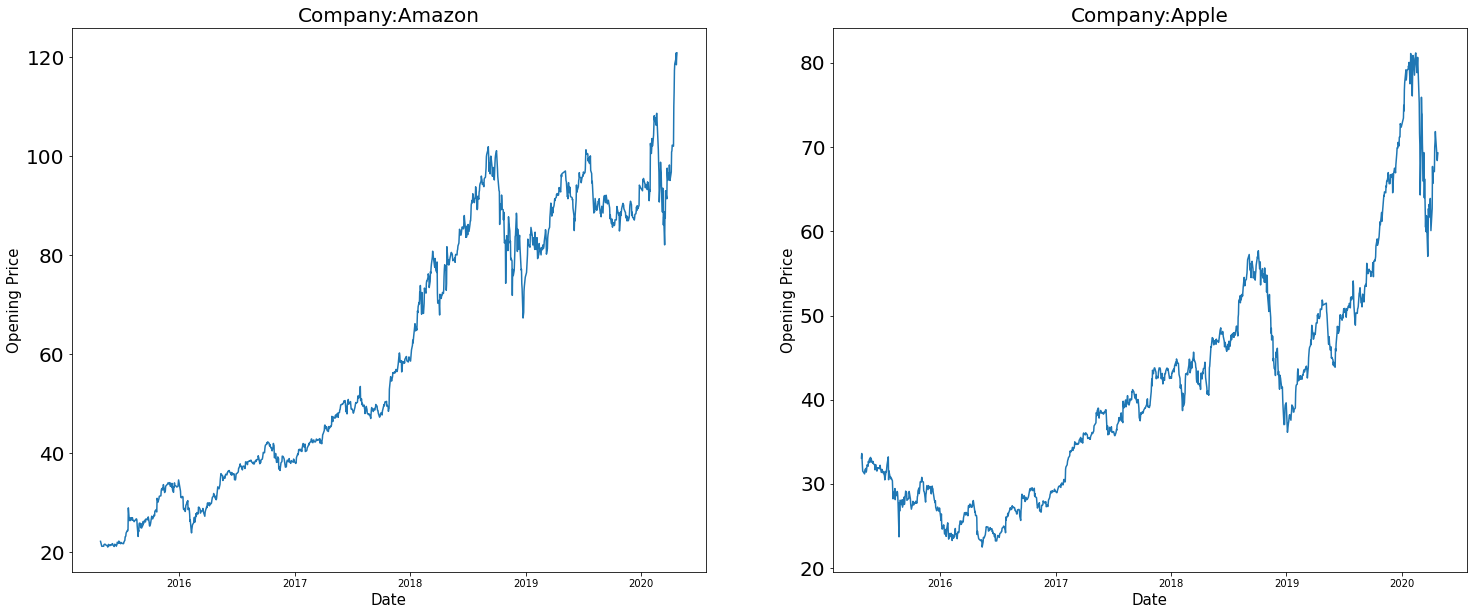

In [67]:
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening Price',fontsize = 15)
plt.plot(sData['Open']['AMZN'])

plt.subplot(122)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening Price',fontsize = 15)
plt.plot(sData['Open']['AAPL'])

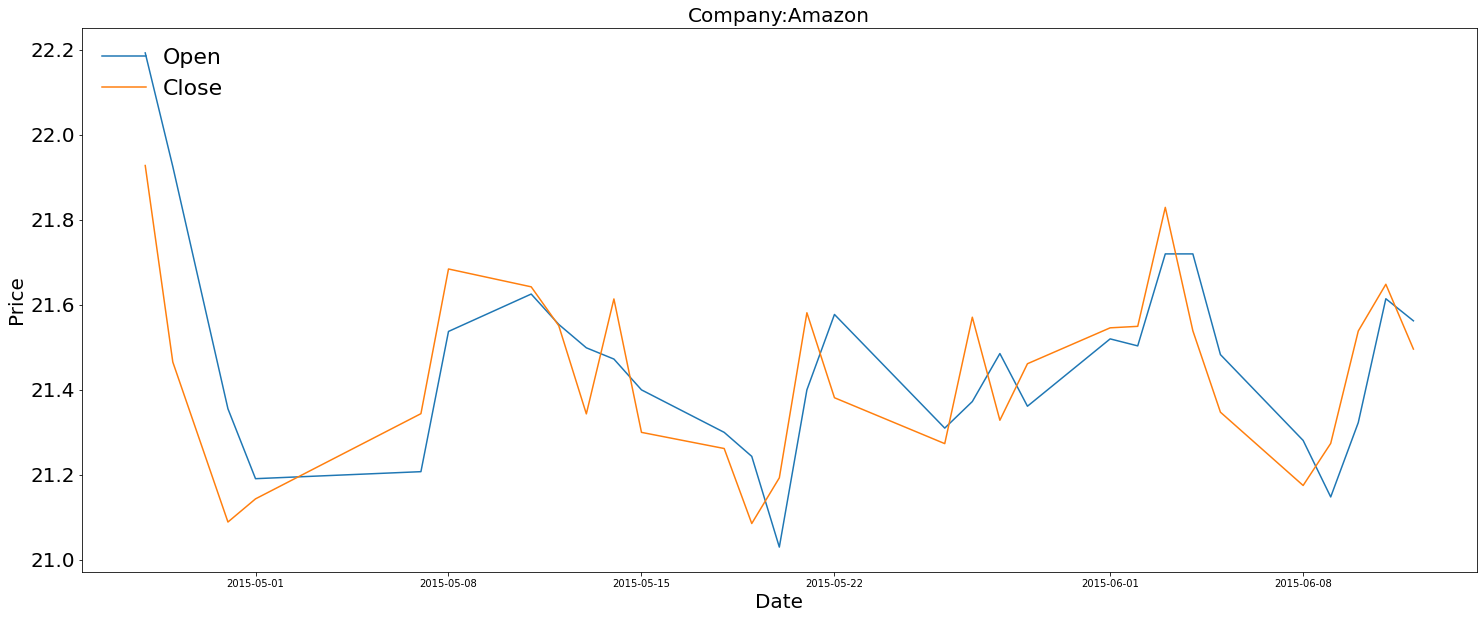

In [73]:
plt.figure(figsize=(25,10))


plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(sData.iloc[:30]['Open']['AMZN'], label = 'Open') # Opening prices of first 30 days are plotted against time
plt.plot(sData.iloc[:30]['Close']['AMZN'], label = 'Close') # Closinging prices of first 30 days are plotted against time
plt.legend(loc = 'upper left', frameon = False, framealpha = 1, prop = {'size':22}) # Properties of legend box

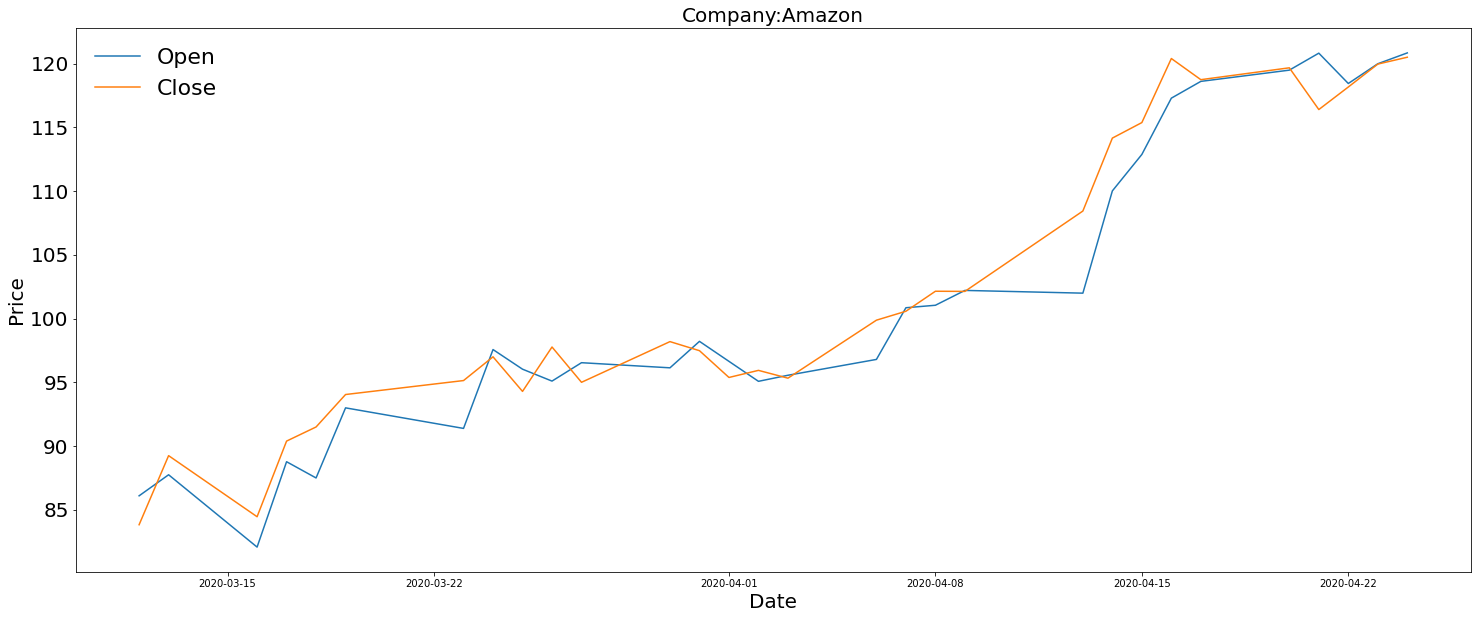

In [74]:
plt.figure(figsize=(25,10))


plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(sData.iloc[-30:]['Open']['AMZN'], label = 'Open') # Opening prices of first 30 days are plotted against time
plt.plot(sData.iloc[-30:]['Close']['AMZN'], label = 'Close') # Closinging prices of first 30 days are plotted against time
plt.legend(loc = 'upper left', frameon = False, framealpha = 1, prop = {'size':22}) # Properties of legend box

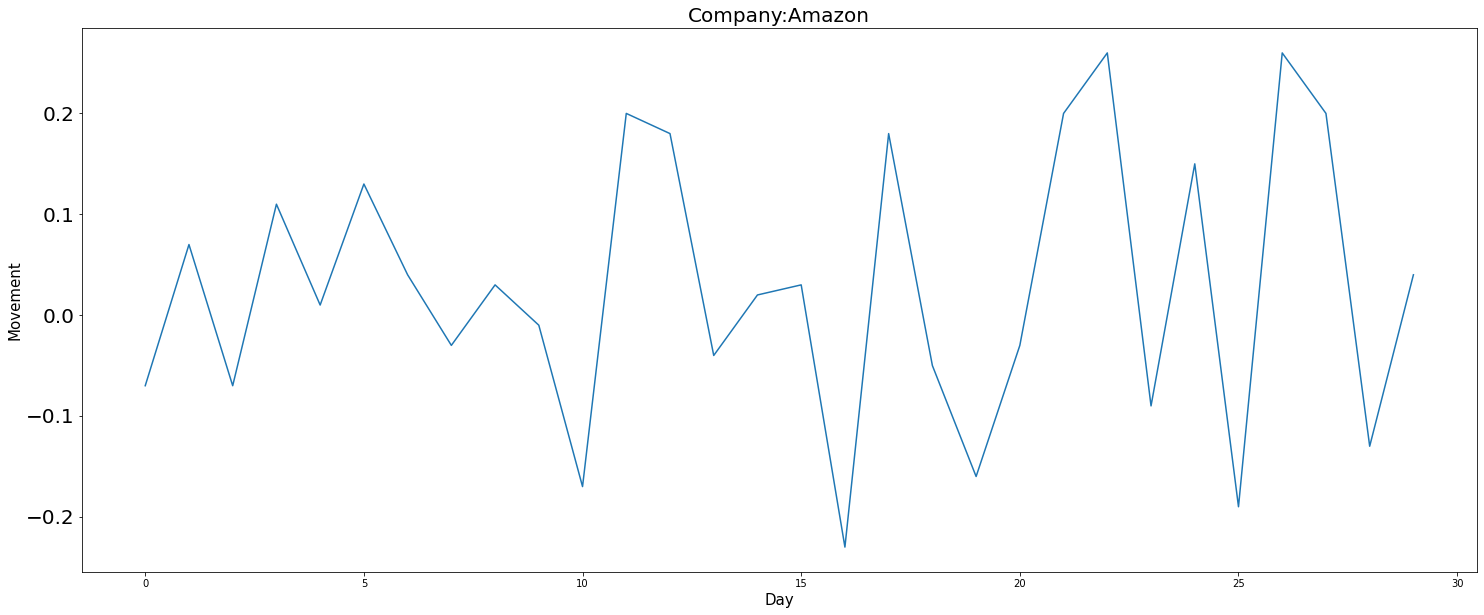

In [78]:
plt.figure(figsize=(25,10))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Day',fontsize = 15)
plt.ylabel('Movement',fontsize = 15)
plt.plot(movements[i][:30])

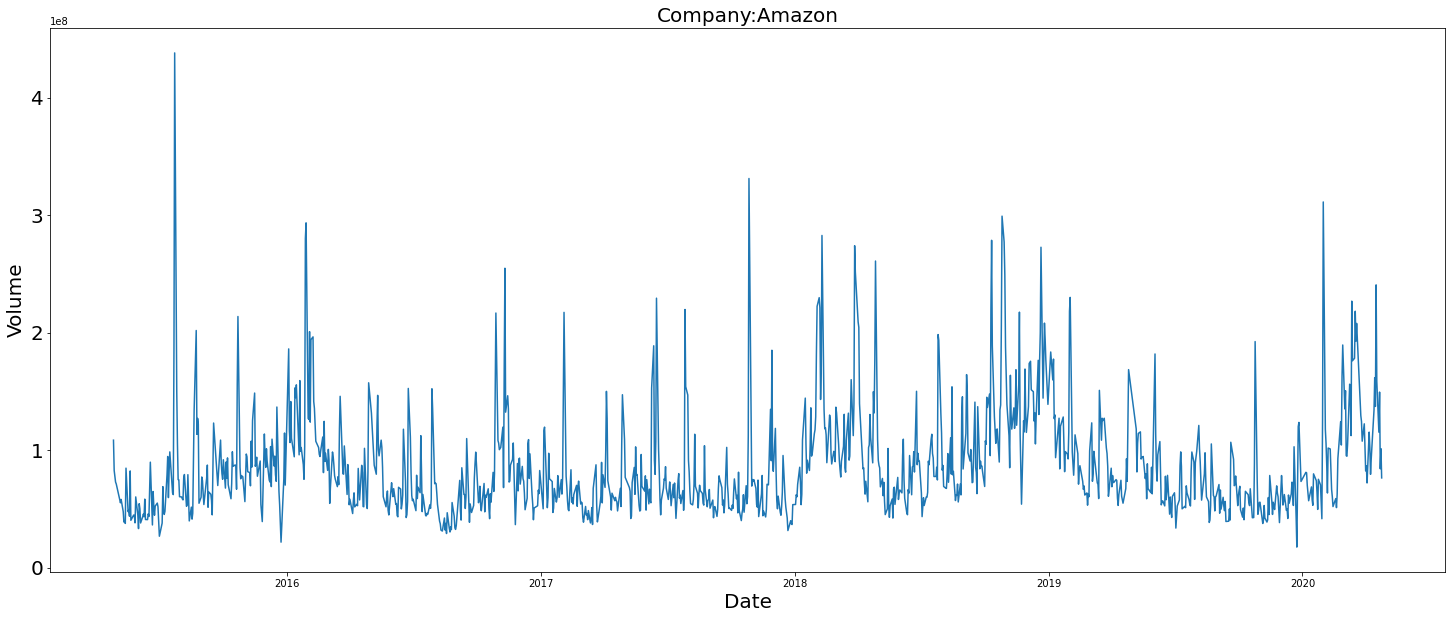

In [79]:
# Volume of stocks traded 

plt.figure(figsize=(25,10))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(sData['Volume']['AMZN'])

### *NORMALIZATION*

In [80]:
# Since the stock prices are different, we will normalize them to a common scale

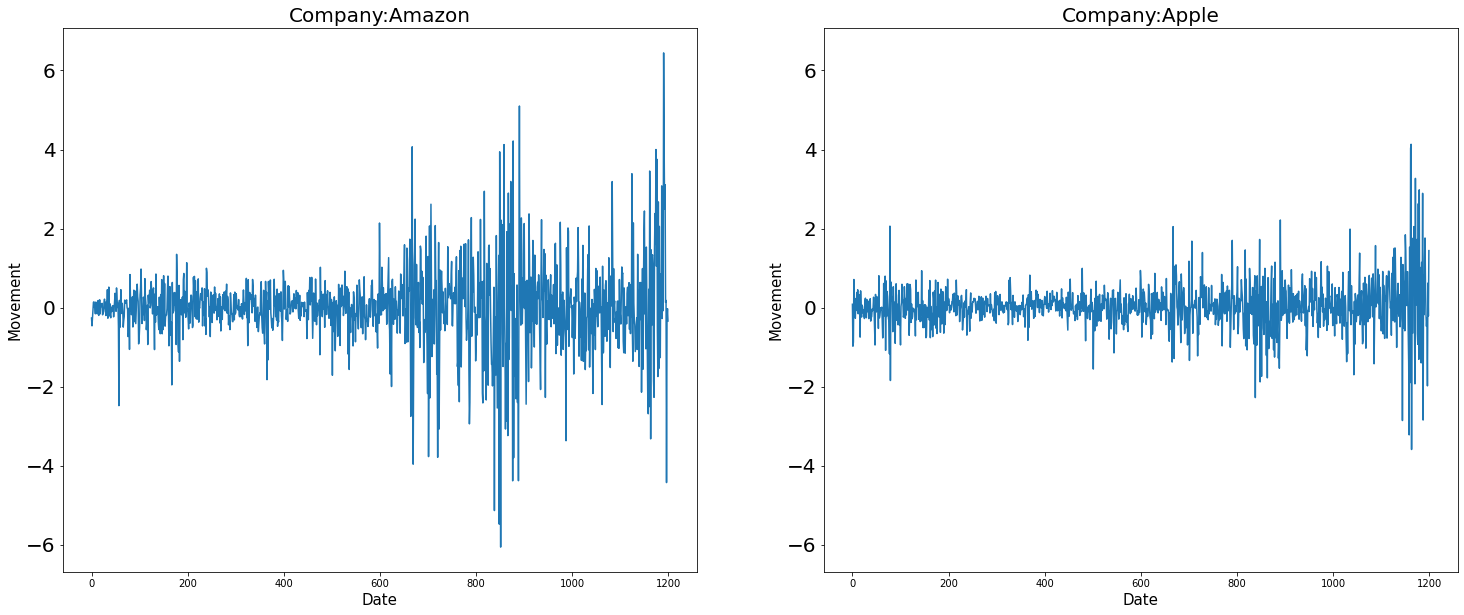

In [83]:
plt.figure(figsize=(25,10))

ax1= plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Movement',fontsize = 15)
plt.plot(movements[0])

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Movement',fontsize = 15)
plt.plot(movements[1])

In [84]:
from sklearn.preprocessing import Normalizer # importing Normalizer

normalizer = Normalizer() # initializing a Normalizer

norm_movements = normalizer.fit_transform(movements)

In [85]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.2573226175191609
0.2767074304683768
-3.686336397822989e-05


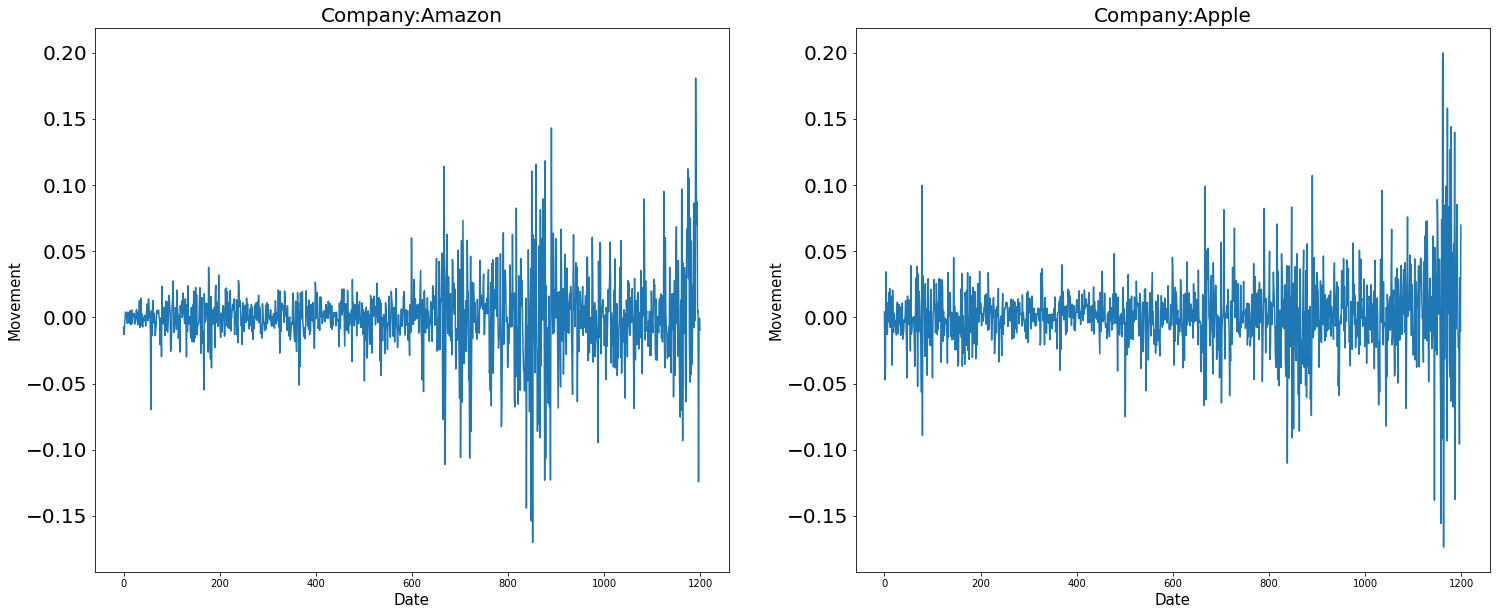

In [86]:
plt.figure(figsize=(25,10))

ax1= plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Movement',fontsize = 15)
plt.plot(norm_movements[0])

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Movement',fontsize = 15)
plt.plot(norm_movements[1])

### *CREATING A PIPELINE*

In [87]:
from sklearn.pipeline import make_pipeline # importing pipeline 
from sklearn.cluster import KMeans # importing KMeans
from sklearn.preprocessing import Normalizer # importing Normalizer

normalizer = Normalizer() # initializing a Normalizer

kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0) # initializing KMeans

pipeline = make_pipeline(normalizer,kmeans) # Create a pipeline

pipeline.fit(movements) # Fit pipeline to daily stocks movements

predictions = pipeline.predict(movements)

In [89]:
predictions # different clusters

array([1, 1, 0, 4, 0, 4, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2,
       2, 2, 0, 0])

In [91]:
ClusteredCompanies = pd.DataFrame({'Cluster':predictions, 'Companies':list(companies_dict)})
ClusteredCompanies

,Cluster,Companies
0,1,Amazon
1,1,Apple
2,0,Walgreen
3,4,Northrpo Grumman
4,0,Boeing
5,4,Lockheed Martin
6,0,McDonalds
7,1,Intel
8,0,IBM
9,1,Texas Instruments


In [93]:
ClusteredCompanies[ClusteredCompanies['Cluster'] == 0]

,Cluster,Companies
2,0,Walgreen
4,0,Boeing
6,0,McDonalds
8,0,IBM
12,0,General Electronics
13,0,American Express
14,0,Pepsi
15,0,Coca Cola
16,0,Johnson & Johnson
17,0,Toyota


In [94]:
ClusteredCompanies[ClusteredCompanies['Cluster'] == 1]

,Cluster,Companies
0,1,Amazon
1,1,Apple
7,1,Intel
9,1,Texas Instruments
10,1,MasterCard
11,1,Microsoft


In [95]:
ClusteredCompanies[ClusteredCompanies['Cluster'] == 2]

,Cluster,Companies
21,2,Exxon
22,2,Chevron
23,2,Valero Energy


In [96]:
ClusteredCompanies[ClusteredCompanies['Cluster'] == 3]

,Cluster,Companies
19,3,Mistubishi


In [97]:
ClusteredCompanies[ClusteredCompanies['Cluster'] == 4]

,Cluster,Companies
3,4,Northrpo Grumman
5,4,Lockheed Martin


### *DIMENSIONALITY REDUCTION USING PCA*

In [98]:
norm_movements.shape

(26, 1200)

In [99]:
from sklearn.decomposition import PCA # importing PCA for dimentionality reduction

normalizer = Normalizer() # initializing a Normalizer

pca = PCA(n_components=2) # Reduce the dimension

kmeans = KMeans(n_clusters=5, max_iter=1000) # initializing KMeans

pipeline = make_pipeline(normalizer,pca,kmeans) # Create a pipeline

pipeline.fit(movements) # Fit pipeline to daily stocks movements

predictions = pipeline.predict(movements)

In [107]:
ClusteredCompaniesUpdated = pd.DataFrame({'Clusters':predictions, 'Companies':list(companies_dict)}).sort_values(by = 'Clusters')
ClusteredCompaniesUpdated

,Clusters,Companies
2,0,Walgreen
19,0,Mistubishi
6,0,McDonalds
0,1,Amazon
1,1,Apple
7,1,Intel
9,1,Texas Instruments
10,1,MasterCard
11,1,Microsoft
23,2,Valero Energy


### *PLOTTING THE DECISION BOUNDARY*

<Figure size 432x288 with 0 Axes>

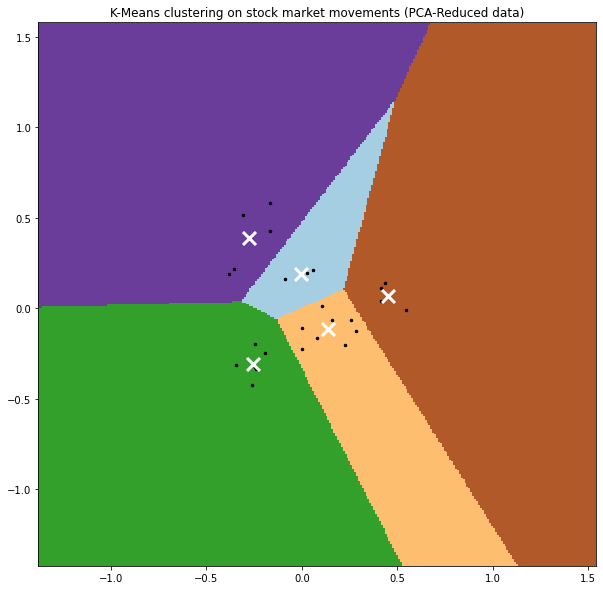

In [108]:

# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()